Best-Fit Line Simulation

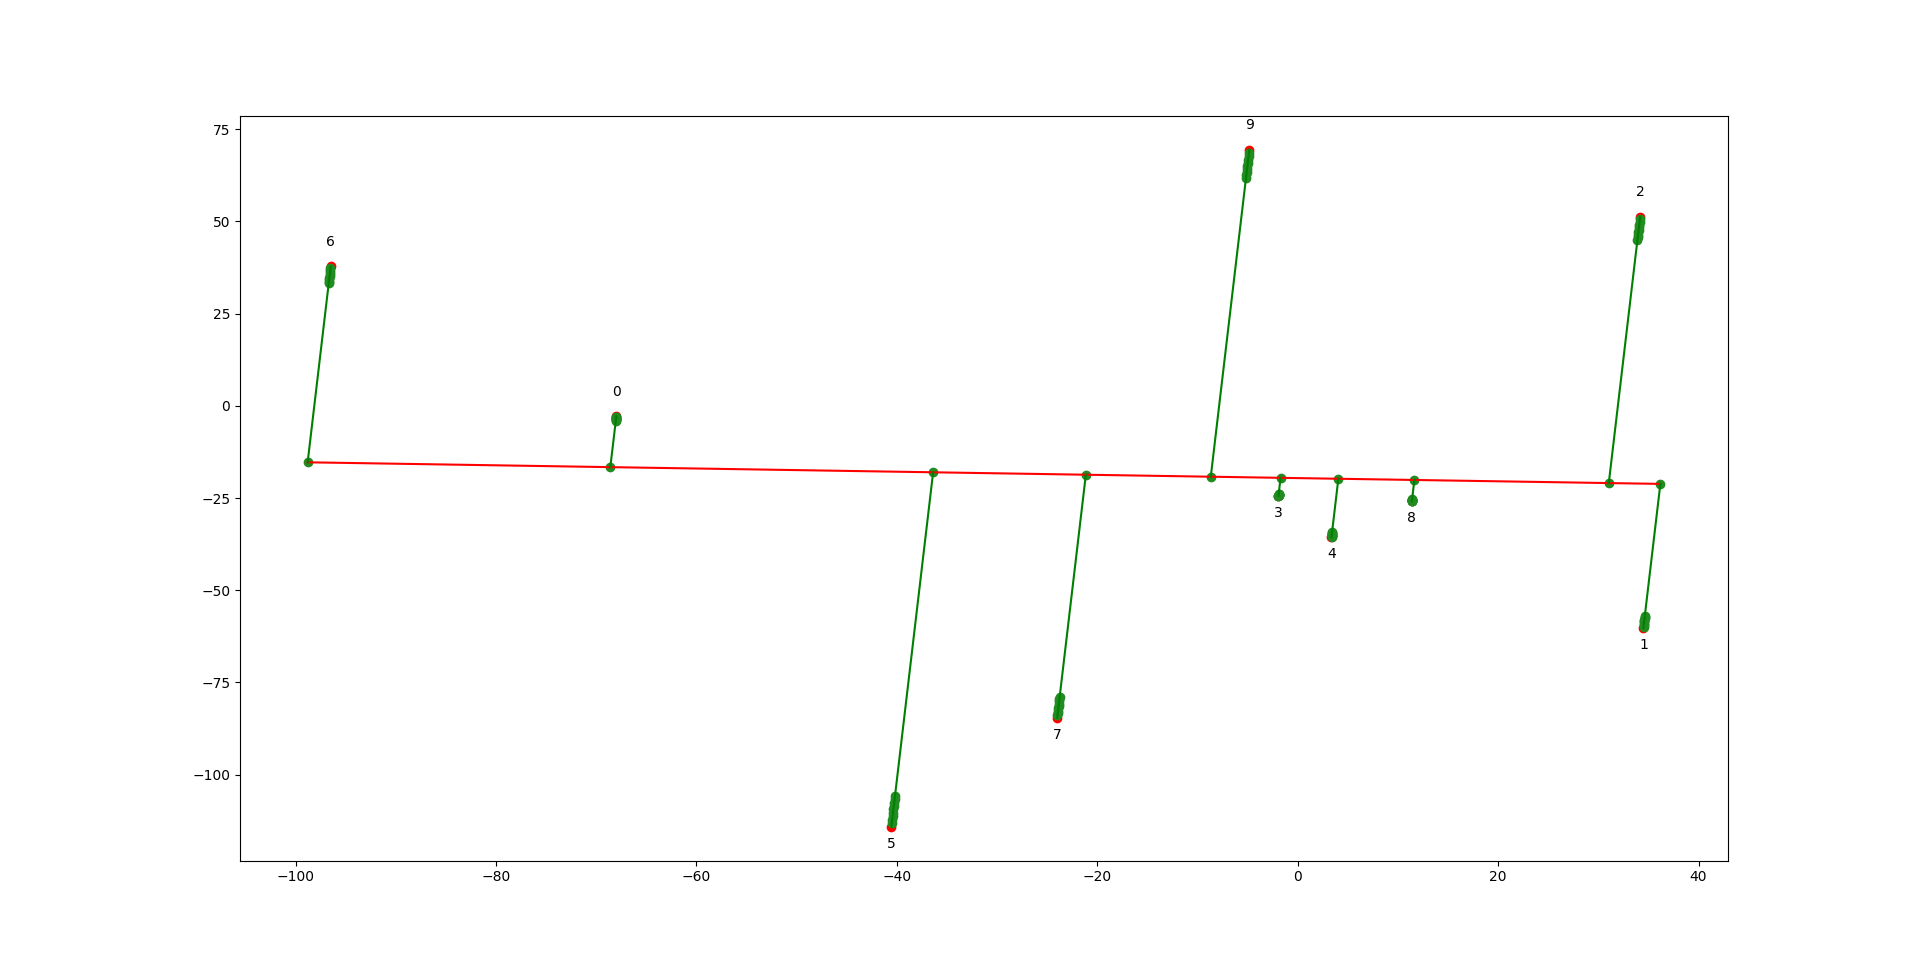

This python code's objective is to exhibit and simulate how a swarm of bots can coordinate to arrange themselves along their best-fit line.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

This imports all necessary libraries for calculation,plotting of the simulation and it's animation.

In [ ]:
number_of_bots= (int)(input("Enter a number: "))
x = np.random.normal(0, 50, number_of_bots)
y = np.random.normal(0, 50, number_of_bots)

This takes in the number of bots needed in the swarm as input from the user and makes two arrays(x and y) with random coordinates of the bots in a range of 0 to 50.50 is taken for convenience.

In [ ]:
def bestfit():
    m=((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)*np.mean(x))-np.mean(x*x))
    c=np.mean(y)-m*np.mean(x)
    return (m,c)

m_bestfit,c_bestfit=bestfit()

def y_bestfit(x):
    return (m_bestfit*x)+c_bestfit

This defines a function which calculates the best-fit line equation.If x and y are the arrays of coordinates,then $$m_{bestfit}=\frac{\sum x \cdot \sum y - n \cdot \sum xy}{(\sum x)^2 - n \cdot \sum x^2}=\frac{\bar{x}\bar{y} -\bar{xy}}{\bar{x}^2 - \bar{x^2}}$$ and $$ c_{bestfit}=\bar{y}-m_{bestfit} \cdot \bar{x}$$ The line equation becomes $$y=m_{bestfit}\cdot x + c_{bestfit}$$

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='r')
x_intersection = (y+(x/m_bestfit)-c_bestfit)/(m_bestfit+(1/m_bestfit))
y_intersection = y_bestfit(x_intersection)
bestfit_parameters=np.linspace(np.min(x_intersection),np.max(x_intersection),1000)
ax.plot(bestfit_parameters, y_bestfit(bestfit_parameters), color='r')


This makes a new figure "fig" and a set of subplots "ax" in the graph.$ax.scatter()$ is used to plot the random coordinates of the bots in red color.We calculate the shortest distance from the bot position and the best fit line by calculating the equation of the line PERPENDICULAR to the best-fit line

$ax.plot()$ also plots the best-fit line by taking in x and y coordinate arrays ,making sure all the intersection points lie on the line.$x_{intersection}$ and $y_{intersection}$ are the points on the best-fit line to which the bots should move.

In [ ]:
m_botpath=[]
c_botpath=[]
for i in range(number_of_bots):
    m_botpath.append((y[i]-y_intersection[i])/(x[i]-x_intersection[i]))
    c_botpath.append(y[i]-m_botpath[i]*x[i])
    ax.plot([x[i], x_intersection[i]], [y[i], y_intersection[i]], color='g')
    #This works as when ax.plot() is given two coordinate lists as arguments,it draws a line passing through these points.

These arrays store all slopes($\frac{-1}{m_{bestfit}}$) and y-intercepts($y_i -m_{bestfit}x_i$) of the perpendicular lines of all the bots.

In [ ]:
x_min_dist=[]
y_min_dist=[]
for i in range(number_of_bots):
    points=ax.scatter([x[i]], [y[i]],color='forestgreen')
    x_min_dist.append(np.linspace(x[i],x_intersection[i],100))
    y_min_dist.append(x_min_dist[i]*m_botpath[i]+c_botpath[i])

This